1. Create a Flask app that displays "Hello, World!" on the homepage.

In [ ]:
from flask import Flask

app = Flask(__name__)

@app.route("/heloo")
def hpomepage():
    return "hello_world"

if __name__=="__main__":
    app.run(host="0.0.0.0",port=5002)


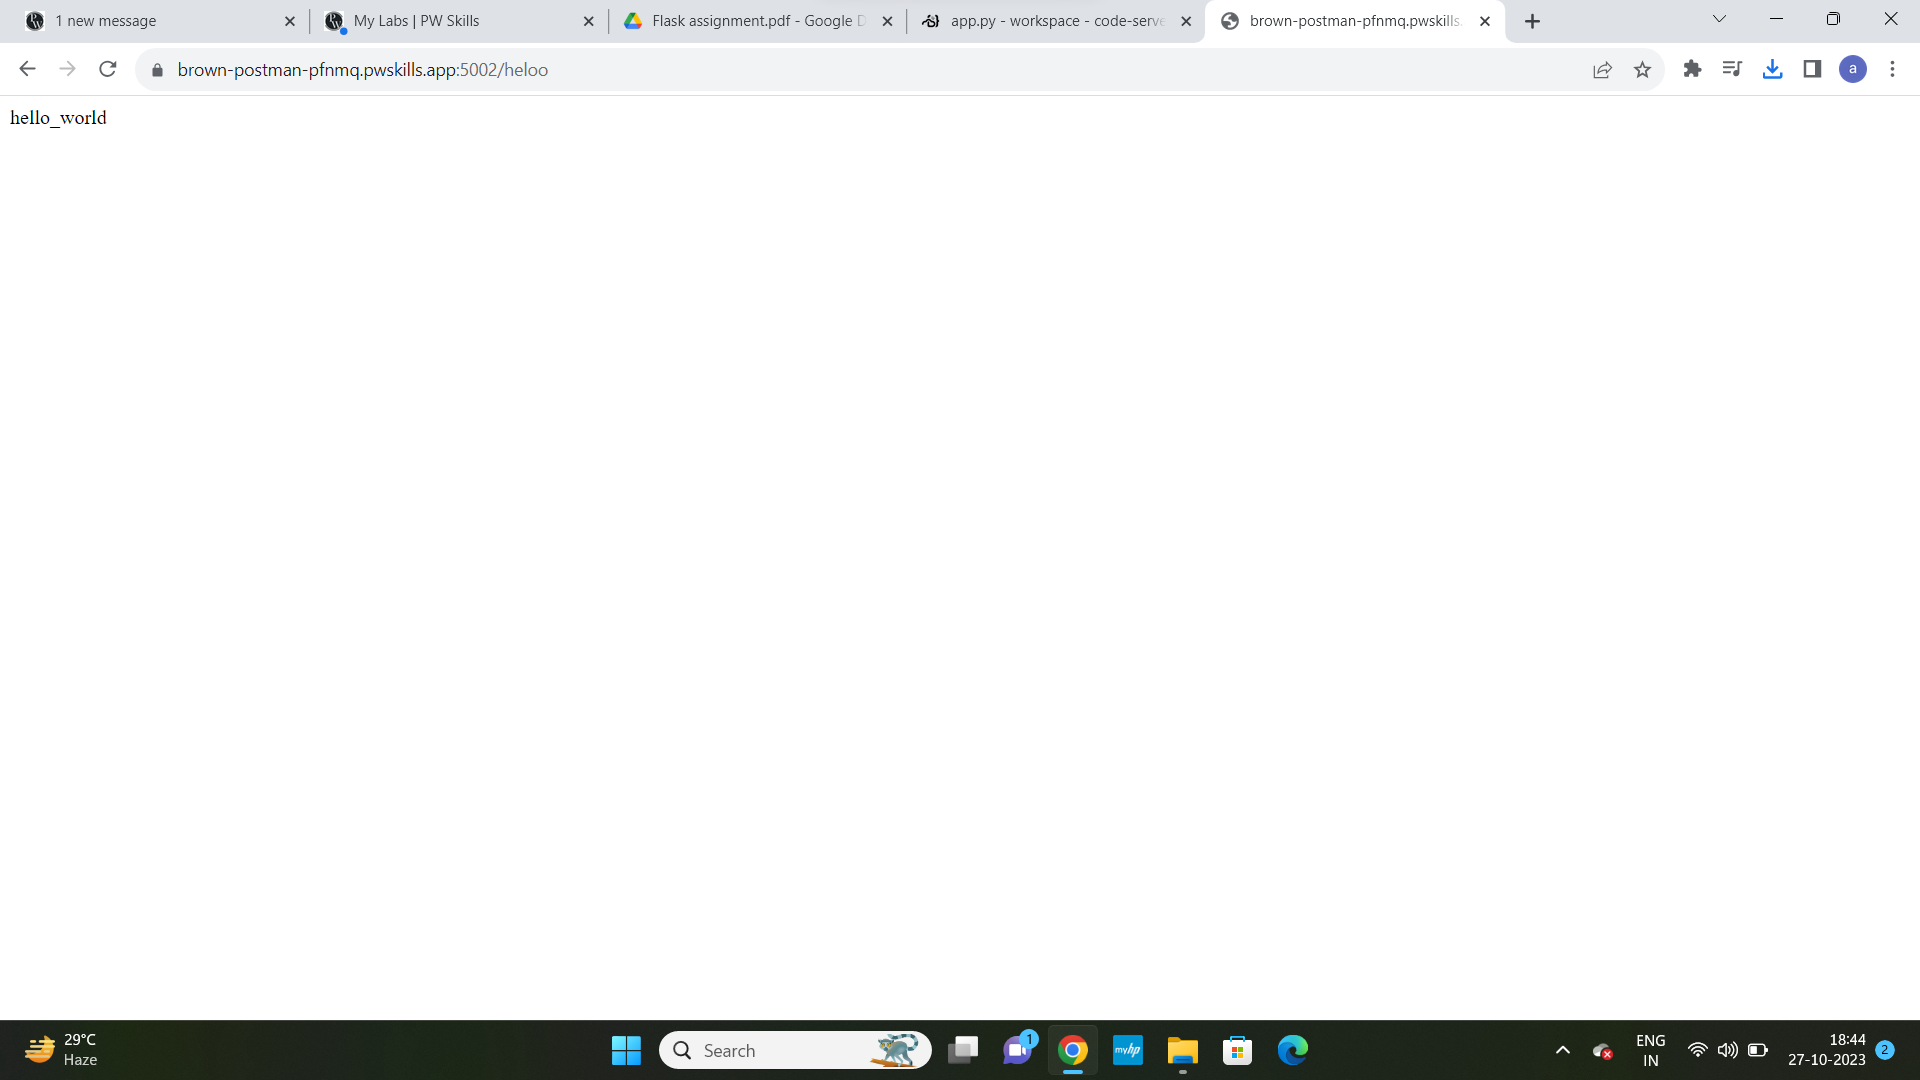

2. Build a Flask app with static HTML pages and navigate between them.

In [ ]:
from flask import Flask , render_template, request
import requests 

app = Flask(__name__)

@app.route('/')
def homepage():
    return render_template("index.html")


if __name__ == '__main__':
    app.run(host= "0.0.0.0" , port = 5002)


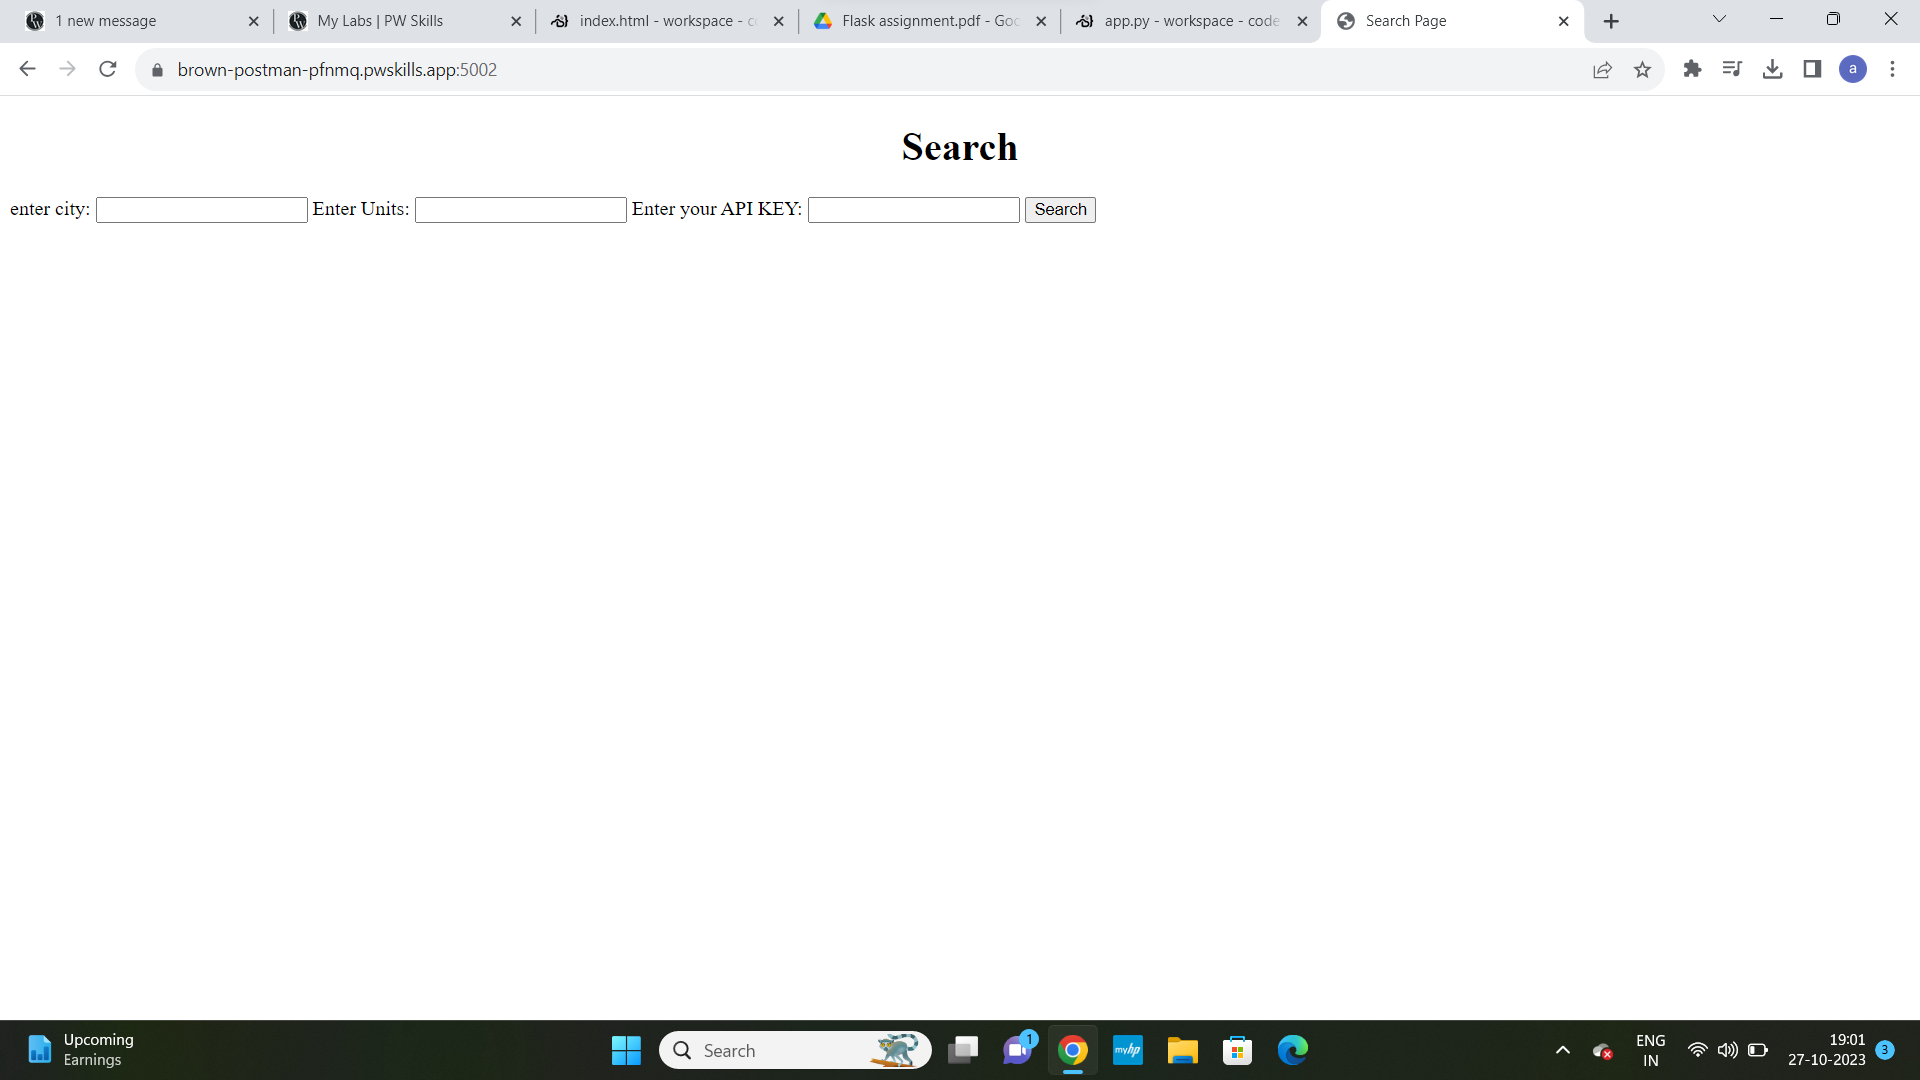

3. Develop a Flask app that uses URL parameters to display dynamic content.

In [ ]:
from flask import Flask, render_template

app = Flask(__name__)

@app.route("/")
def index():
    return render_template("index.html")

@app.route("/user/<username>")
def user(username):
    return render_template("user.html", username=username)

if __name__ == "__main__":
    app.run(debug=True)

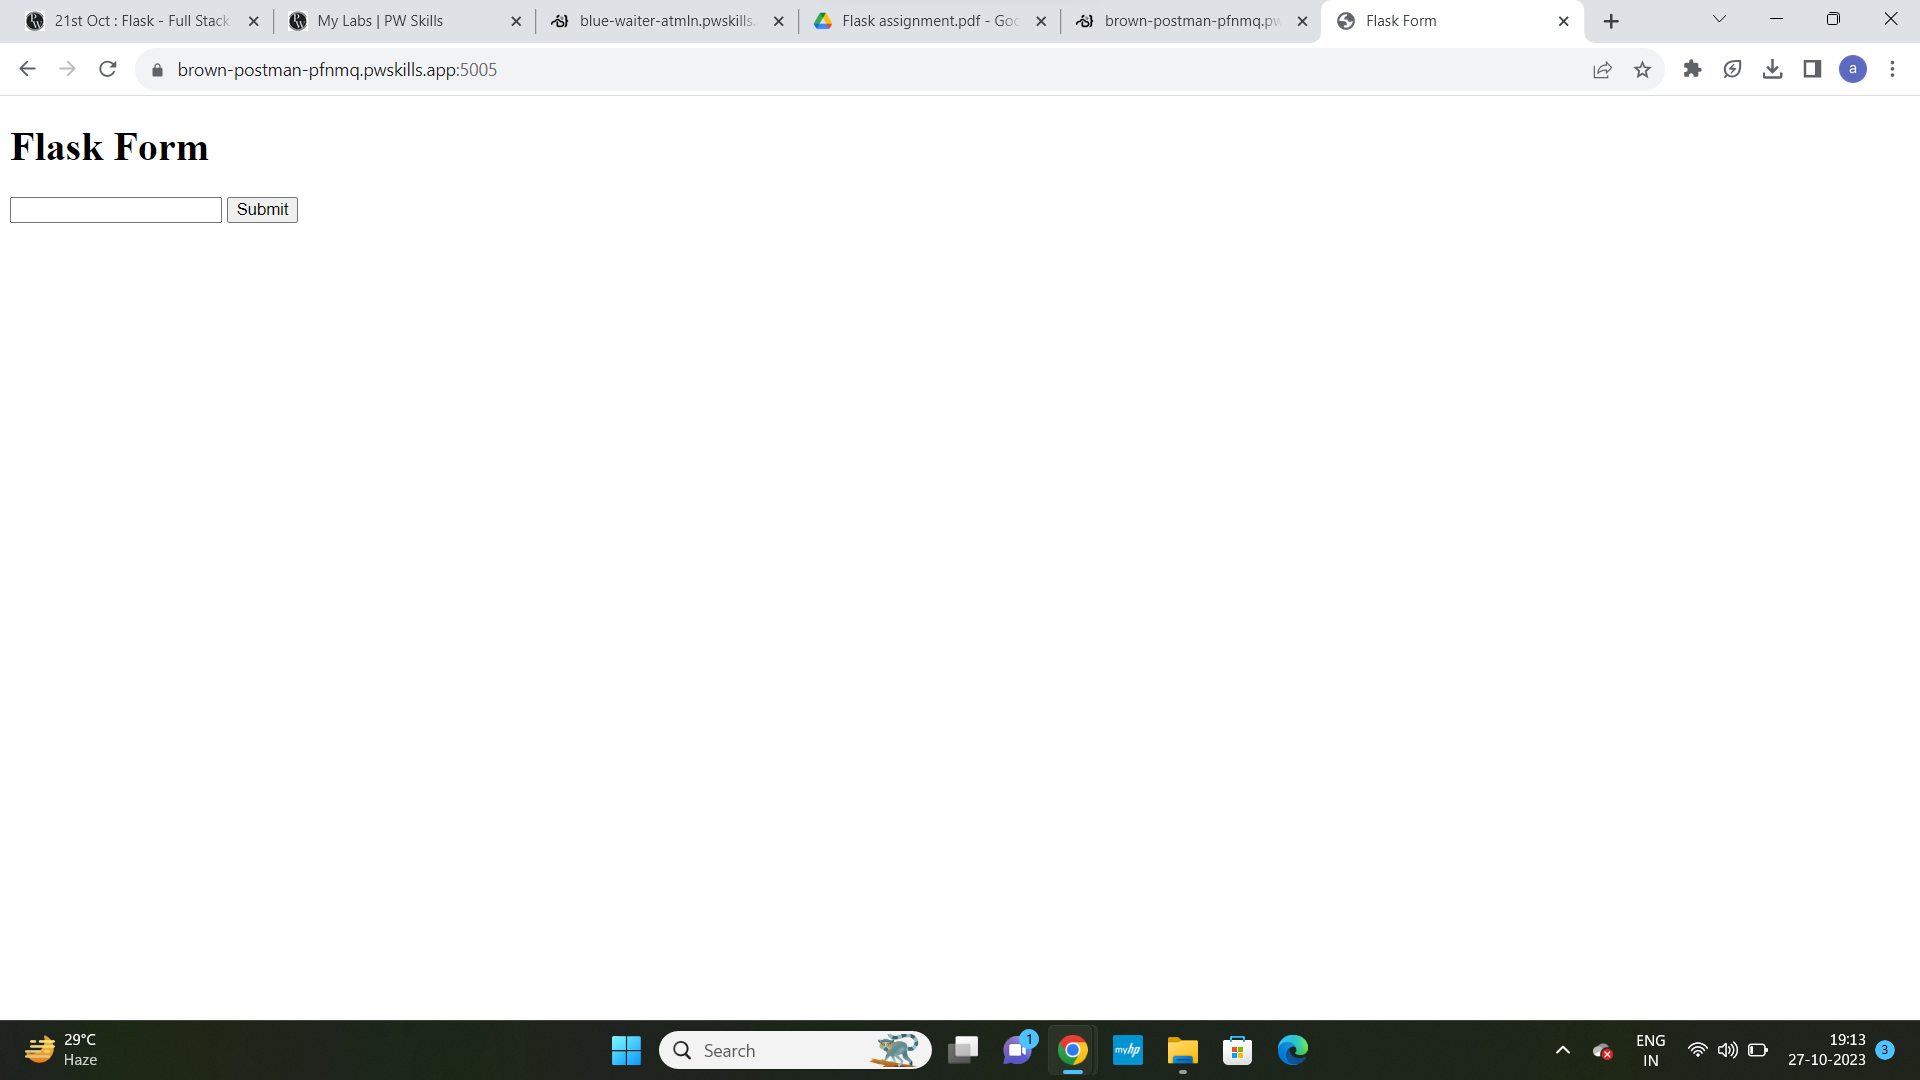4. Create a Flask app with a form that accepts user input and displays it.

4. Create a Flask app with a form that accepts user input and displays it.

In [ ]:
from flask import Flask, render_template, request

app = Flask(__name__)

@app.route("/")
def index():
    return render_template("index.html")

@app.route("/form", methods=["POST", "GET"])
def form():
    if request.method == "GET":
        return render_template("form.html")
    else:
        name = request.form.get("name")
        return render_template("form_submitted.html", name=name)

if __name__ == "__main__":
    app.run()

6. Build a Flask app that allows users to upload files and display them on the website.

In [ ]:
from flask import Flask, render_template, request
from werkzeug.utils import secure_filename

app = Flask(__name__)

UPLOAD_FOLDER = '/uploads'

@app.route('/')
def index():
    return render_template('index.html')

@app.route('/upload', methods=['POST'])
def upload():
    if request.method == 'POST':
        # Get the file name
        file_name = secure_filename(request.files['file'].filename)
        # Save the file
        file = request.files['file']
        file.save(os.path.join(UPLOAD_FOLDER, file_name))
        # Redirect to the index page
        return redirect('/')

if __name__ == '__main__':
    app.run(debug=True)


7. Integrate a SQLite database with Flask to perform CRUD operations on a list of items.

In [ ]:
from flask import Flask, render_template, request
from flask_sqlalchemy import SQLAlchemy

app = Flask(__name__)
db = SQLAlchemy(app)

class Item(db.Model):
    id = db.Column(db.Integer, primary_key=True)
    name = db.Column(db.String(100))
    description = db.Column(db.String(255))
    price = db.Column(db.Float())

@app.route("/")
def index():
    items = Item.query.all()
    return render_template("index.html", items=items)

@app.route("/items/create", methods=["GET", "POST"])
def create_item():
    if request.method == "GET":
        return render_template("create_item.html")
    else:
        name = request.form.get("name")
        description = request.form.get("description")
        price = request.form.get("price")

        new_item = Item(name=name, description=description, price=price)
        db.session.add(new_item)
        db.session.commit()

        return redirect("/")

@app.route("/items/update/<int:id>", methods=["GET", "POST"])
def update_item(id):
    if request.method == "GET":
        item = Item.query.get(id)
        return render_template("update_item.html", item=item)
    else:
        name = request.form.get("name")
        description = request.form.get("description")
        price = request.form.get("price")

        item = Item.query.get(id)
        item.name = name
        item.description = description
        item.price = price

        db.session.commit()

        return redirect("/")

@app.route("/items/delete/<int:id>")
def delete_item(id):
    item = Item.query.get(id)
    db.session.delete(item)
    db.session.commit()

    return redirect("/")

if __name__ == "__main__":
    app.run(host='0.0.0.0',port=8001,debug=True)

8. Implement user authentication and registration in a Flask app using Flask-Login.

In [ ]:
from flask_sqlalchemy import SQLAlchemy

db = SQLAlchemy()

class User(db.Model):
    id = db.Column(db.Integer, primary_key=True)
    username = db.Column(db.String(80), unique=True)
    password = db.Column(db.String(80))
    email = db.Column(db.String(120), unique=True)

    def __init__(self, username, password, email):
        self.username = username
        self.password = password
        self.email = email

    def __repr__(self):
        return '<User %r>' % self.username

from flask_login import LoginManager

login_manager = LoginManager()
login_manager.init_app(app)
login_manager.login_view = 'login'
login_manager.session_protection = 'strong'

@app.route('/register', methods=['GET', 'POST'])
def register():
    if request.method == 'GET':
        return render_template('register.html')
    else:
        username = request.form['username']
        password = request.form['password']
        email = request.form['email']

        user = User(username, password, email)
        db.session.add(user)
        db.session.commit()

        flash('You have successfully registered!')
        return redirect('/login')
    @app.route('/login', methods=['GET', 'POST'])
    def login():
        if request.method == 'GET':
            return render_template('login.html')
        else:
           username = request.form['username']
           password = request.form['password']

        user = User.query.filter_by(username=username).first()

        if user and user.password == password:
            login_manager.login_user(user)
            return redirect('/')
        else:
            flash('Invalid username or password.')
            return redirect('/login')
    @app.route('/logout')
    def logout():
        login_manager.logout_user()
        return redirect('/')
    @app.route('/protected')
    @login_required
    def protected():
        return 'You are logged in!'

9. Create a RESTful API using Flask to perform CRUD operations on resources like books or movies.

In [ ]:
from flask import request, jsonify

class Books:
    def get(self):
        books = [
            {
                "id": 1,
                "title": "The Da Vinci Code",
                "author": "Dan Brown"
            },
            {
                "id": 2,
                "title": "The Girl with the Dragon Tattoo",
                "author": "Stieg Larsson"
            },
            {
                "id": 3,
                "title": "The Hunger Games",
                "author": "Suzanne Collins"
            }
        ]
        return jsonify(books)

    def post(self):
        data = request.get_json()
        book = {
            "id": len(books) + 1,
            "title": data["title"],
            "author": data["author"]
        }
        books.append(book)
        return jsonify(book)

    def put(self, id):
        data = request.get_json()
        book = [book for book in books if book["id"] == id][0]
        book["title"] = data["title"]
        book["author"] = data["author"]
        return jsonify(book)

    def delete(self, id):
        book = [book for book in books if book["id"] == id][0]
        books.remove(book)
        return jsonify({"message": "Book deleted"})
from flask import Flask, jsonify

app = Flask(__name__)

@app.route("/")
def index():
    return jsonify({"message": "Welcome to the Books API"})

@app.route("/books", methods=["GET", "POST"])
def books():
    if request.method == "GET":
        return Books().get()
    elif request.method == "POST":
        return Books().post()

@app.route("/books/<int:id>", methods=["GET", "PUT", "DELETE"])
def book(id):
    if request.method == "GET":
        return Books().get(id)
    elif request.method == "PUT":
        return Books().put(id)
    elif request.method == "DELETE":
        return Books().delete(id)

if __name__ == "__main__":
    app.run(host='0.0.0.0',port=8001,debug=True)

10. Design a Flask app with proper error handling for 404 and 500 errors.

In [ ]:
from flask import Flask, render_template, abort

app = Flask(__name__)

@app.route("/")
def index():
    return render_template("index.html")

@app.route("/about")
def about():
    return render_template("about.html")

@app.errorhandler(404)
def page_not_found(e):
    return render_template("404.html"), 404

@app.errorhandler(500)
def internal_server_error(e):
    return render_template("500.html"), 500

if __name__ == "__main__":
    app.run(host='0.0.0.0',port=8004)

# Real-time Development:

11. Create a real-time chat application using Flask-SocketIO.

github_link=https://github.com/123avichal/chat_room3.git
render_link=https://chat-room3.onrender.com

12. Build a Flask app that updates data in real-time using WebSocket connections.

github_link=https://github.com/123avichal/WebSocket-connections.1.git
render_link=https://socket-9iz2.onrender.com

13. Implement notifications in a Flask app using websockets to notify users of updates.

git_hub_link = https://github.com/123avichal/wewebsockets-to-notify-users-of-updates1.git
render_link =https://websockets-to-notify-users-of-updates.onrender.com